1. Data processing :
two files to be processes : temperature file and population file

In [13]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import pandas as pd
from importlib import reload
import functions as f
from tqdm import tqdm
import plotly.express as px
from PIL import Image

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
reload(f)

<module 'functions' from 'c:\\Users\\croge\\OneDrive\\Documents\\cours EPFL\\MA3\\ML_project\\UHI_prediction\\functions.py'>

In [14]:
#pop_day_europe = rio.open(r'data_population_day\ENACT_POP_D072011_EU28_R2020A_4326_30ss_V1_0.tif')
#pop_night_europe = rio.open(r'data_night_30ss\ENACT_POP_N072011_EU28_R2020A_4326_30ss_V1_0.tif')

land_cover = rio.open(r"MCD12Q1.061_LC_Prop1_doy2011001_aid0001.tif")

elevation1 = rio.open(r'elevation\30N000E_20101117_gmted_mea300.tif')
elevation2 = rio.open(r'elevation\30N030W_20101117_gmted_mea300.tif')
elevation3 = rio.open(r'elevation\50N000E_20101117_gmted_mea300.tif')
elevation4 = rio.open(r'elevation\50N030W_20101117_gmted_mea300.tif')

NDVI = xr.open_dataset(r'NDVI\c_gls_NDVI_201406110000_GLOBE_PROBAV_V2.2.1.nc')

vienna_tas = xr.open_dataset(r'data_cities\vienna_data\tas_Vienna_UrbClim_2011_08_v1.0.nc')

elev_list = [elevation1,elevation2,elevation3,elevation4]
folder = 'data_cities'

In [3]:
elevation = rio.open(r'elevation\elevation_merged.tif') 
cities = ['Amsterdam', 'Madrid', 'Stockholm', 'Lyon', 'Vienna']

In [19]:
reload(f)
#city_df = f.process_data(elevation, land_cover, NDVI, 40000, cities=cities)
city_df = pd.read_csv('data_cities/city_df.csv')
#city_df.to_csv('data_cities\city_df.csv')

In [20]:
latitudes = {'Amsterdam' : 52.377956, 'Madrid' : 40.416775, 'Stockholm' : 59.329323, 'Lyon' : 45.764043, 'Vienna' : 48.208174}
#add a column with the latitude of the city
city_df['latitude'] = city_df['city'].map(latitudes)
city_df.head()

,Unnamed: 0,temp,pop,wind,hum,deltaT,hour,month,elevation,city,land cover type,NDVI,isrural,latitude
0,0,274.48145,0.000000,2.208353,92.426930,-0.513397,18,1,0.0,Amsterdam,3.0,0.936,1.0,52.377956
1,1,273.67807,1.753243,4.078188,86.734920,0.607880,20,1,4.0,Amsterdam,15.0,0.920,NaN,52.377956
2,2,278.45407,11029.792192,3.854456,85.954350,0.746094,13,1,7.0,Amsterdam,1.0,0.448,NaN,52.377956
3,3,279.59946,3182.414418,3.749156,88.955230,-0.185394,13,1,0.0,Amsterdam,22.0,0.672,NaN,52.377956
4,4,276.39307,0.000000,4.549990,95.903534,-0.240265,16,1,0.0,Amsterdam,3.0,0.936,1.0,52.377956


In [21]:
city_df.fillna(0, inplace=True)
city_df.describe().loc[:,'pop']

count    2.214463e+06
mean     1.301598e+03
std      2.965127e+03
min     -2.000000e+02
25%      2.766911e+00
50%      1.135271e+02
75%      1.091769e+03
max      3.432265e+04
Name: pop, dtype: float64

array([<Axes: title={'center': 'NDVI'}>], dtype=object)

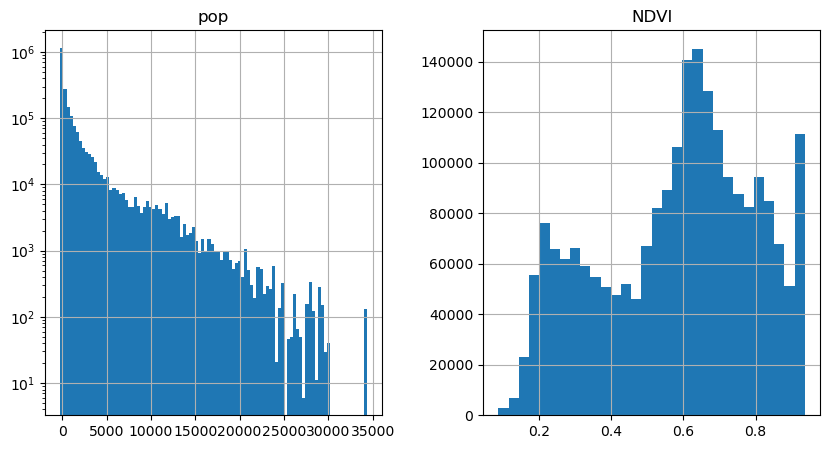

In [22]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
city_df.hist(column='pop', bins=100, log=True, ax=axs[0])
city_df.hist(column='NDVI', bins=30, ax=axs[1])


Lets do some exploratory data analysis on the data first

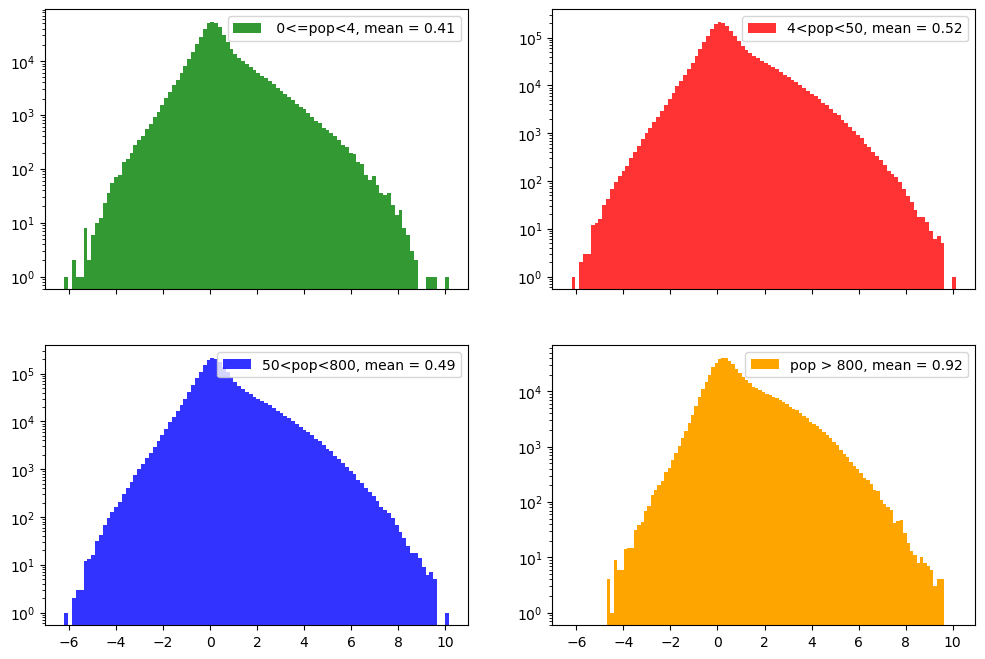

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)


axs[0,1].hist(city_df[(city_df['pop']>=2) & city_df['pop']<115]['deltaT'], log=True, bins = 100, alpha = 0.8, color = 'red', label =  f'4<pop<50, mean = {np.mean(city_df[(city_df["pop"]>=2) & city_df["pop"]<115]["deltaT"]):.2f}')
axs[0,1].legend()
axs[0,0].hist(city_df[(city_df["pop"]>=0) & (city_df["pop"]<2)]["deltaT"], log=True, bins = 100, color = 'green', alpha = 0.8, label = f' 0<=pop<4, mean = {np.mean(city_df[(city_df["pop"]>0) & (city_df["pop"]<2)]["deltaT"]):.2f}')
axs[0,0].legend()
axs[1,0].hist(city_df[(city_df['pop']>115) & city_df['pop']<1083]['deltaT'], log=True, bins = 100, alpha = 0.8, color = 'blue', label =  f'50<pop<800, mean = {np.mean(city_df[(city_df["pop"]>115) & (city_df["pop"]<1083)]["deltaT"]):.2f}')
axs[1,0].legend()
axs[1,1].hist(city_df[city_df['pop']>1083]['deltaT'], log=True, bins = 100, alpha = 1, color = 'orange', label =  f'pop > 800, mean = {np.mean(city_df[city_df["pop"]>1083]["deltaT"]):.2f}')
axs[1,1].legend()


plt.show()


In [24]:
city_df['NDVI'].describe()

count    2.214463e+06
mean     5.834231e-01
std      2.133033e-01
min      8.800001e-02
25%      4.160000e-01
50%      6.160001e-01
75%      7.480001e-01
max      9.360000e-01
Name: NDVI, dtype: float64

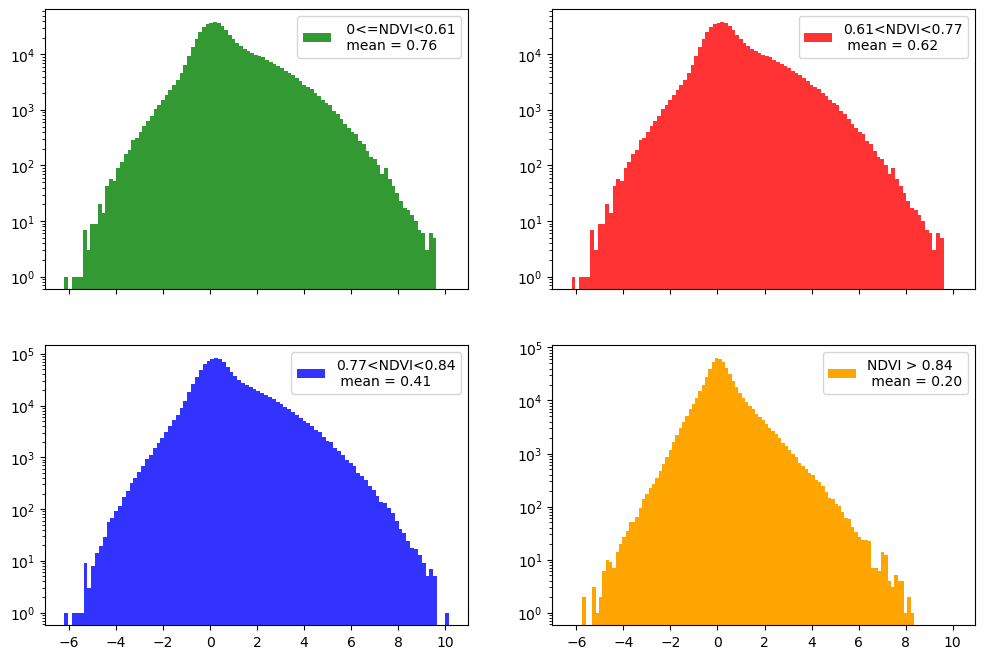

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)


axs[0,1].hist(city_df[(city_df['NDVI']>=0.41) & city_df['NDVI']<0.61]['deltaT'], log=True, bins = 100, alpha = 0.8, color = 'red', label =  f'0.61<NDVI<0.77\n mean = {np.mean(city_df[(city_df["NDVI"]>=0.41) & city_df["pop"]<0.61]["deltaT"]):.2f}')
axs[0,1].legend()
axs[0,0].hist(city_df[(city_df["pop"]>=0) & (city_df["NDVI"]<0.41)]["deltaT"], log=True, bins = 100, color = 'green', alpha = 0.8, label = f' 0<=NDVI<0.61\n mean = {np.mean(city_df[(city_df["NDVI"]>0) & (city_df["NDVI"]<0.41)]["deltaT"]):.2f}')
axs[0,0].legend()
axs[1,0].hist(city_df[(city_df['NDVI']>0.61) & city_df['NDVI']<0.74]['deltaT'], log=True, bins = 100, alpha = 0.8, color = 'blue', label =  f'0.77<NDVI<0.84\n mean = {np.mean(city_df[(city_df["NDVI"]>0.61) & (city_df["NDVI"]<0.74)]["deltaT"]):.2f}')
axs[1,0].legend()
axs[1,1].hist(city_df[city_df['NDVI']>=0.74]['deltaT'], log=True, bins = 100, alpha = 1, color = 'orange', label =  f'NDVI > 0.84\n mean = {np.mean(city_df[city_df["NDVI"]>=0.74]["deltaT"]):.2f}')
axs[1,1].legend()


plt.show()


Text(0.5, 1.0, 'Avg DeltaT vs NDVI')

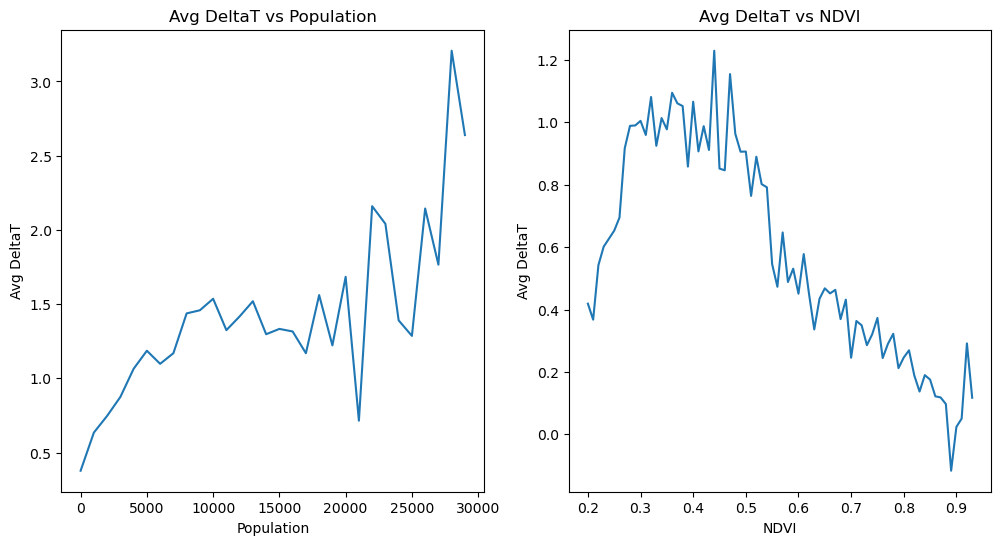

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
#create a list of tuples with population intervals
pop_intervals = [(i,i+1000) for i in range(0, 30000, 1000)]
#compute the avg detlaT for each population interval
deltaT_list = [np.mean(city_df[(city_df['pop']>i) & (city_df['pop']<j)]['deltaT']) for i,j in pop_intervals]
#plot the avg deltaT for each population interval
axs[0].plot([i for i,j in pop_intervals], deltaT_list)
axs[0].set_xlabel('Population')
axs[0].set_ylabel('Avg DeltaT')
axs[0].set_title('Avg DeltaT vs Population')

#create a list of tuples with NDVI intervals (between 0 and 1)
NDVI_intervals = [(i/100, (i+1)/100) for i in range(20, 100)]
#compute the avg detlaT for each population interval
deltaT_list = [np.mean(city_df[(city_df['NDVI']>i) & (city_df['NDVI']<j)]['deltaT']) for i,j in NDVI_intervals]
#plot the avg deltaT for each NDVIulation interval
axs[1].plot([i for i,j in NDVI_intervals], deltaT_list)
axs[1].set_xlabel('NDVI')
axs[1].set_ylabel('Avg DeltaT')
axs[1].set_title('Avg DeltaT vs NDVI')


In [28]:
#create a column with population category : 0 for pop<100, 2 for 100<pop<1000, 2 for 1000<pop<100000, 3 for pop>100000
city_df['pop_cat'] = city_df['pop'].apply(lambda x : 0 if x<100 else (1 if x<1000 else (2 if x<10000 else 3)))

In [33]:
#Linear regression using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

city_df_test = city_df.sample(300000)

X = city_df_test[city_df_test['isrural'] == 0][['pop', 'elevation', 'land cover type', 'hum', 'wind', 'hour','month', 'NDVI', 'pop_cat', 'temp']]
y = city_df_test[city_df_test['isrural'] == 0]['deltaT']

#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['pop', 'elevation', 'hum', 'wind', 'NDVI', 'temp']] = scaler.fit_transform(X[['pop', 'elevation', 'hum', 'wind', 'NDVI', 'temp']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''#sample the data to have equal data per category of population
X_sampled = pd.DataFrame(columns = X.columns)
for i in range(4):
    X_sampled = pd.concat([X_sampled, X_train[X_train['pop_cat']==i].sample(100000)])

indexes = X_sampled.index
y_sampled = y_train.loc[indexes]'''

"#sample the data to have equal data per category of population\nX_sampled = pd.DataFrame(columns = X.columns)\nfor i in range(4):\n    X_sampled = pd.concat([X_sampled, X_train[X_train['pop_cat']==i].sample(100000)])\n\nindexes = X_sampled.index\ny_sampled = y_train.loc[indexes]"

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
print(X_train.shape)

(121990, 10)


# Multi-layer Perceptron regressor

MLP are a category of machine learning algorithm consisting in at least 3 layers of fully interconnected neurons. Learning occurs by changing the connection weights base on the error between the predicted and the actual output. The backpropagation algorithm is used to calculate the error and update the weights. The major disadvantage of MLP is that it is very computationally expensive to train. Here is a schema of an MLP regressor from Skiba (2020)
<p align="center">
  <img src="Example-of-multilayer-perceptron-MLP-network-for-regression-analysis-here-n-13-and.png" />
</p>


In [76]:
#Implement MLP regressor
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(100),
                    activation='relu', verbose=True, solver='adam',
                    alpha=0.0001, random_state=42, tol = 10e-5, learning_rate_init=0.001,
                    learning_rate='adaptive', warm_start=True, epsilon=0.001, early_stopping=True,
                    validation_fraction=0.1, n_iter_no_change=10,
                    )

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 score: ', r2_score(y_test, y_pred))




Iteration 1, loss = 0.71997714
Validation score: 0.336180
Iteration 2, loss = 0.50175304
Validation score: 0.428539
Iteration 3, loss = 0.45593965
Validation score: 0.461397
Iteration 4, loss = 0.43186736
Validation score: 0.487907
Iteration 5, loss = 0.41549979
Validation score: 0.496355
Iteration 6, loss = 0.40496037
Validation score: 0.513616
Iteration 7, loss = 0.39564842
Validation score: 0.527259
Iteration 8, loss = 0.38575053
Validation score: 0.539409
Iteration 9, loss = 0.37756806
Validation score: 0.542529
Iteration 10, loss = 0.37270470
Validation score: 0.546612
Iteration 11, loss = 0.36756661
Validation score: 0.558411
Iteration 12, loss = 0.36156964
Validation score: 0.556306
Iteration 13, loss = 0.35822202
Validation score: 0.566691
Iteration 14, loss = 0.35282944
Validation score: 0.569245
Iteration 15, loss = 0.34811630
Validation score: 0.579509
Iteration 16, loss = 0.34465379
Validation score: 0.575530
Iteration 17, loss = 0.34215827
Validation score: 0.583303
Iterat

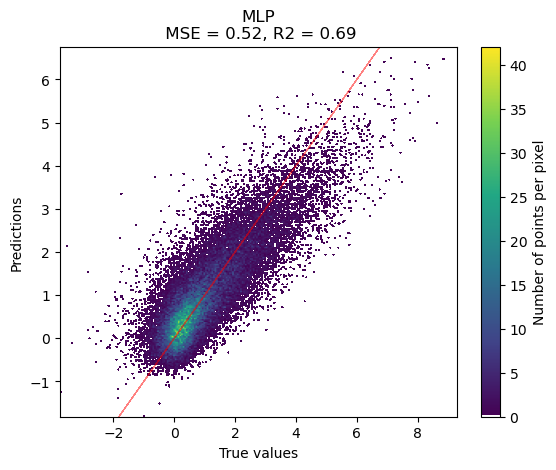

In [78]:
#plot the predictions vs the true values
fig = plt.figure()
f.using_mpl_scatter_density(fig, y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title(f'MLP\n MSE = {round(mean_squared_error(y_test, y_pred), 2)}, R2 = {round(r2_score(y_test, y_pred), 2)}')
plt.plot(y_test, y_test, color='red', linewidth=.5, alpha = 0.5)
fig.show()

MSE:  0.6778573041999648
R2:  0.5953165763330781
{'max_depth': 8, 'min_samples_split': 9, 'splitter': 'best'}


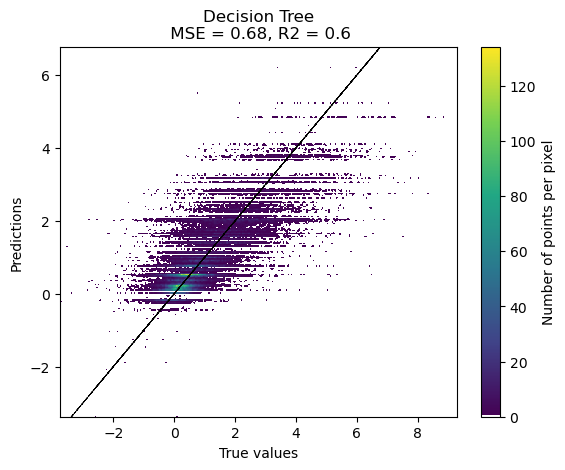

In [82]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=42)

cv = GridSearchCV(model, param_grid={'max_depth': [8], 
                                     'splitter' : ['best'],
                                     'min_samples_split' : [9]},
                                    cv=5, n_jobs=-1)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print(cv.best_params_)

fig = plt.figure()
f.using_mpl_scatter_density(fig,y_test, y_pred)
plt.title(f'Decision Tree\n MSE = {round(mean_squared_error(y_test, y_pred), 2)}, R2 = {round(r2_score(y_test, y_pred), 2)}')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.plot(y_test, y_test, color='black', linewidth=.5, linestyle='dashed')


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, max_depth=14, n_estimators=100, min_samples_split=2, verbose=4, n_jobs=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


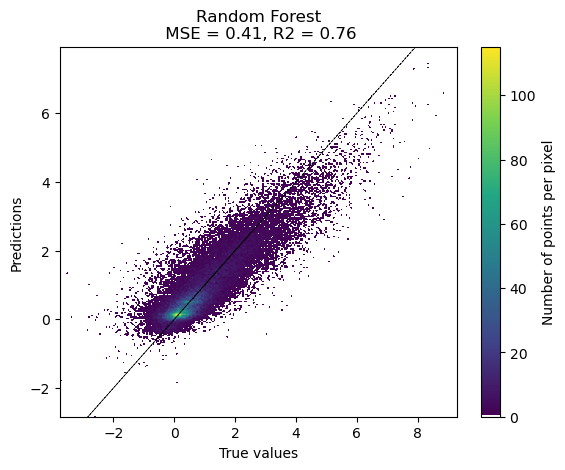

In [81]:
fig = plt.figure()
f.using_mpl_scatter_density(fig,y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title(f'Random Forest\n MSE = {round(mean_squared_error(y_test, y_pred), 2)}, R2 = {round(r2_score(y_test, y_pred), 2)}')
plt.plot(y_test, y_test, color='black', linewidth=.5, linestyle='dashed')
plt.show()

In [67]:
#extra trees
from sklearn.ensemble import ExtraTreesRegressor

cv = ExtraTreesRegressor(random_state=42, n_jobs=1, n_estimators=100, max_depth=20, min_samples_split=2, max_features=10, verbose=2)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))




building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.0min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


MSE:  0.37406410264441553
R2:  0.7766822887485162


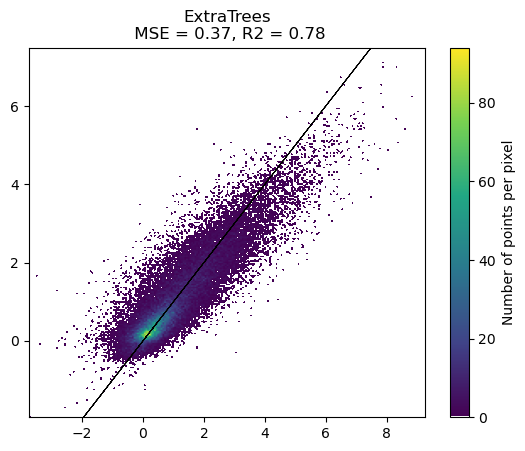

In [68]:
#print variance and bias
fig = plt.figure()
f.using_mpl_scatter_density(fig,y_test, y_pred)
plt.plot(y_test, y_test, color='black', linewidth=.5, linestyle='dashed')
plt.title(f'ExtraTrees\n MSE = {round(mean_squared_error(y_test, y_pred), 2)}, R2 = {round(r2_score(y_test, y_pred), 2)}')
plt.show()

# Gradient Boosting regressor

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. The sklearn histGradientBoostingRegressor is based on the LightGBM method that uses an histogram based method to bin the features, therefore using less memory and being faster than the classical gradient boosting method. Here is a schema of the gradient boosting algorithm.
<p align="center">
  <img src="Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png" />
</p>


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END learning_rate=0.1, max_depth=8, max_iter=1000, min_samples_leaf=2;, score=0.783 total time=  20.6s
[CV 2/5] END learning_rate=0.1, max_depth=8, max_iter=1000, min_samples_leaf=2;, score=0.775 total time=   9.0s
[CV 3/5] END learning_rate=0.1, max_depth=8, max_iter=1000, min_samples_leaf=2;, score=0.777 total time=  12.0s
[CV 4/5] END learning_rate=0.1, max_depth=8, max_iter=1000, min_samples_leaf=2;, score=0.783 total time=  13.0s
[CV 5/5] END learning_rate=0.1, max_depth=8, max_iter=1000, min_samples_leaf=2;, score=0.780 total time=  12.9s
MSE:  0.34238455184834976
R2:  0.7955951026946799
{'learning_rate': 0.1, 'max_depth': 8, 'max_iter': 1000, 'min_samples_leaf': 2}


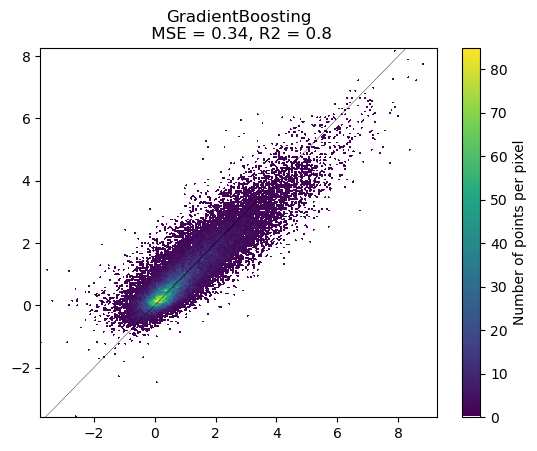

In [109]:
#Gradient boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state=42)

cv = GridSearchCV(model, param_grid={'max_depth': [8],
                                        'learning_rate' : [0.1],
                                        'min_samples_leaf' : [2],
                                        'max_iter' : [1000]},
                                        cv=5, n_jobs=1, verbose = 3)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print(cv.best_params_)

fig = plt.figure()
f.using_mpl_scatter_density(fig, y_test, y_pred)
plt.title(f'GradientBoosting\n MSE = {round(mean_squared_error(y_test, y_pred), 2)}, R2 = {round(r2_score(y_test, y_pred), 2)}')
plt.plot(y_test, y_test, color='black', linestyle='dashed', linewidth=.2)

MSE:  0.606120224463159
R2:  0.6381438894738887
{'learning_rate': 0.1, 'max_depth': 8, 'max_iter': 1000, 'min_samples_leaf': 2}


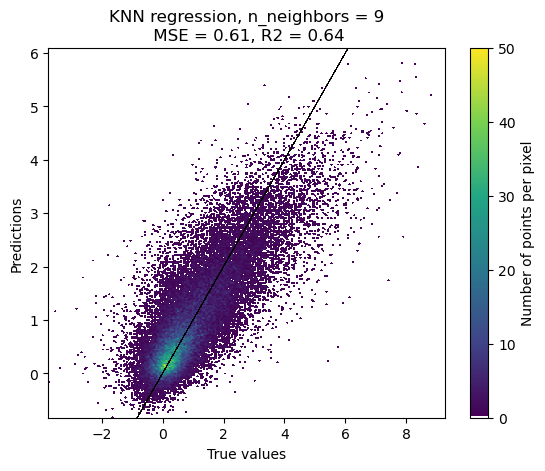

In [54]:
#KNN regression
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=9)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print(cv.best_params_)

fig = plt.figure()
f.using_mpl_scatter_density(fig, y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title(f'KNN regression, n_neighbors = 9\n MSE = {round(mean_squared_error(y_test, y_pred), 2)}, R2 = {round(r2_score(y_test, y_pred), 2)}')
plt.plot(y_test, y_test, color='black', linestyle='dashed', linewidth=.2)

In [112]:
#export the model
model_final = cv.best_estimator_
print(model_final.predict(X_test.iloc[0:1]))

[0.87930144]
2075627    0.583496
Name: deltaT, dtype: float64


MSE:  1.0837780239765828
R2:  0.35298034185018734


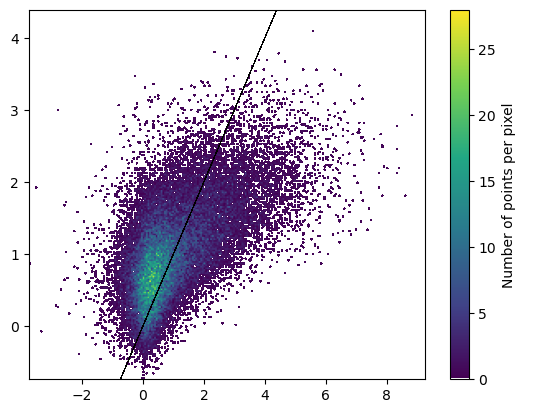

In [92]:
#Nystroem approximation
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

model = make_pipeline(Nystroem(random_state=42, gamma=0.001, degree = 7, n_components=300), SGDRegressor(random_state=42, tol=1e-5, max_iter=1000))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

fig = plt.figure()
f.using_mpl_scatter_density(fig, y_test, y_pred)
plt.plot(y_test, y_test, color='black', linestyle='dashed', linewidth=.2)


In [127]:
russ_madrid = xr.open_dataset(r'data_cities\madrid_data\russ_Madrid_UrbClim_2011_09_v1.0.nc')
ws_madrid = xr.open_dataset(r'data_cities\madrid_data\sfcWind_Madrid_UrbClim_2011_09_v1.0.nc')
urban_mask_m = xr.open_dataset(r'data_cities\madrid_data\ruralurbanmask_Madrid_UrbClim_v1.0.nc')

temp_madrid = xr.open_dataset(r'data_cities\madrid_data\tas_Madrid_UrbClim_2011_09_v1.0.nc')

min_lon = temp_madrid.longitude.min().values
max_lon = temp_madrid.longitude.max().values
min_lat = temp_madrid.latitude.min().values
max_lat = temp_madrid.latitude.max().values

pop_day_m = rio.open(r'data_population_day\ENACT_POP_D092011_EU28_R2020A_4326_30ss_V1_0.tif')
pop_night_m = rio.open(r'data_population_night\ENACT_POP_N092011_EU28_R2020A_4326_30ss_V1_0.tif')

elevation = rio.open(r'elevation\elevation_merged.tif')
land_cover = rio.open(r'MCD12Q1.061_LC_Prop1_doy2011001_aid0001.tif')
NDVI = xr.open_dataset(r'NDVI\c_gls_NDVI_201406110000_GLOBE_PROBAV_V2.2.1.nc')

elevation_m = f.crop_image(elevation, temp_madrid)
land_cover_m = f.crop_image(land_cover, temp_madrid)
pop_day_m = f.crop_image(pop_day_m, temp_madrid)
pop_night_m = f.crop_image(pop_night_m, temp_madrid)

NDVI_masked = NDVI.sel(lon=slice(min_lon,max_lon),lat=slice(max_lat,min_lat))
NDVI_m = NDVI_masked.NDVI.values[0,:,:]

elevation_m = f.resample_image(elevation_m, temp_madrid.tas[0,:,:].shape)
land_cover_m = f.resample_image(land_cover_m, temp_madrid.tas[0,:,:].shape)
NDVI_m = f.resample_image(NDVI_m, temp_madrid.tas[0,:,:].shape)
pop_day_m = f.resample_image(pop_day_m, temp_madrid.tas[0,:,:].shape)
pop_night_m = f.resample_image(pop_night_m, temp_madrid.tas[0,:,:].shape)




In [138]:
reload(f)
deltaT = f.compute_deltaT_urban(temp_madrid, urban_mask_m, 189)

madrid_df = pd.DataFrame(
    {'pop': pop_day_m.flatten(),
     'elevation': elevation_m.flatten(),
     'land cover type': land_cover_m.flatten(),
     'NDVI': NDVI_m.flatten(),
     'temp': temp_madrid.tas[189,:,:].values.flatten(),
     'hum': russ_madrid.russ[189,:,:].values.flatten(),
     'wind': ws_madrid.sfcWind[189,:,:].values.flatten(),
     'hour': [189 for i in range(301*301)],
     'month': [9 for i in range(301*301)],
    })
madrid_df['pop_cat'] = city_df['pop'].apply(lambda x : 0 if x<100 else (1 if x<1000 else (2 if x<10000 else 3)))


In [141]:
deltaT_predicted = model_final.predict(madrid_df[['pop', 'elevation', 'land cover type', 'hum', 'wind', 'hour','month', 'NDVI', 'pop_cat', 'temp']])
deltaT_predicted = deltaT_predicted.reshape(301,301)

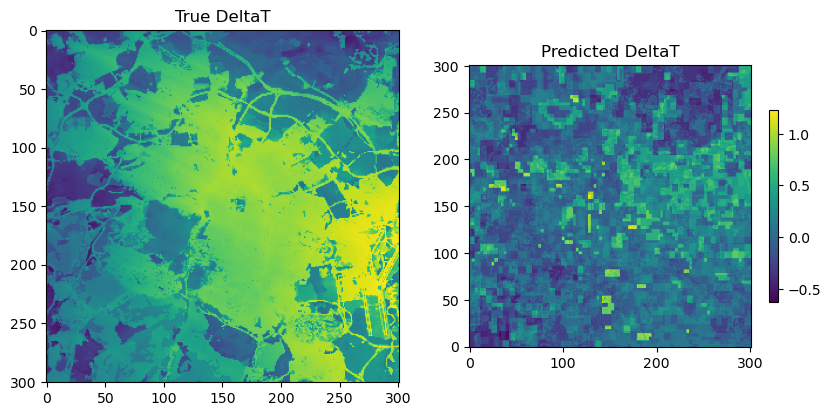

In [146]:
fig,axs = plt.subplots(1,2, figsize=(10,5))

axs[0].imshow(deltaT.reshape(301,301))
axs[0].set_title('True DeltaT')
axs[1].imshow(deltaT_predicted.reshape(301,301))
#turn x axis
axs[1].set_ylim(axs[1].get_ylim()[::-1])
axs[1].set_title('Predicted DeltaT')
#add colorbar
fig.colorbar(axs[1].imshow(deltaT_predicted.reshape(301,301)), ax=axs[1], shrink=0.5)

Original array:
(38, 49)


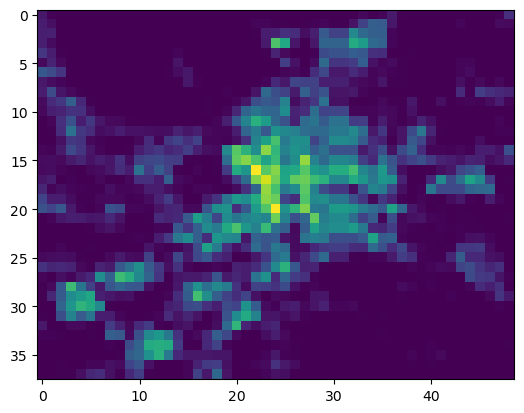

Resampled by a factor of 2 with nearest interpolation:
(266, 343)


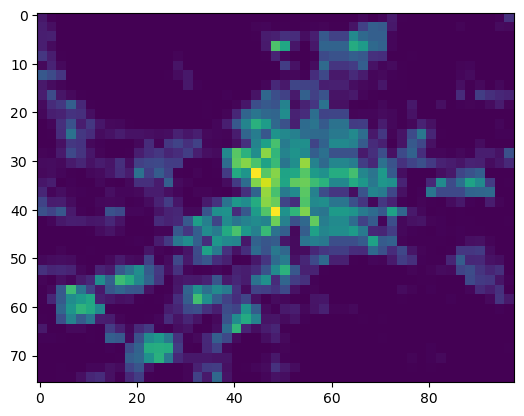

Resampled by a factor of 2 with bilinear interpolation:


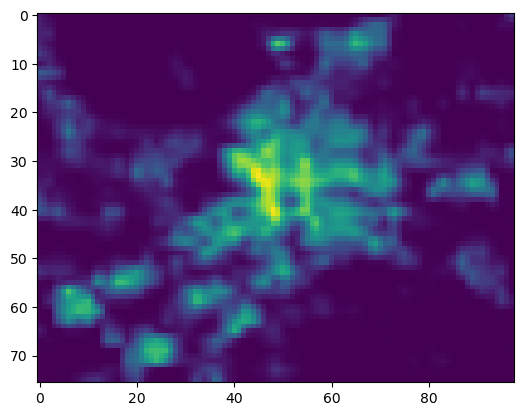

Resampled by a factor of 2 with cubic interpolation:
(228, 294)


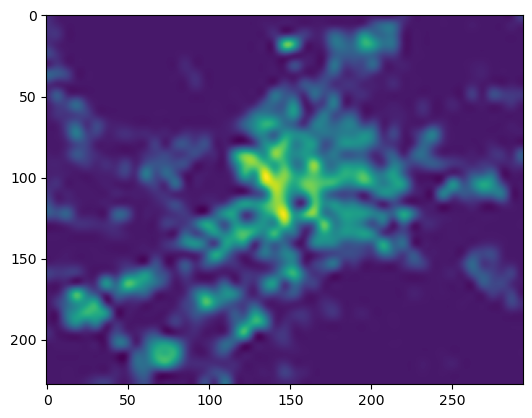

In [169]:
import numpy as np
import scipy.ndimage

pop_day_m = rio.open(r'data_population_day\ENACT_POP_D092011_EU28_R2020A_4326_30ss_V1_0.tif')
pop_day_m = f.crop_image(pop_day_m, temp_madrid)
x = pop_day_m

print('Original array:')
print(x.shape)
plt.imshow(x)
plt.show()

print( 'Resampled by a factor of 2 with nearest interpolation:')
print((scipy.ndimage.zoom(x, np.floor(301/min([x.shape[0], x.shape[1]])), order=0).shape))
plt.imshow(scipy.ndimage.zoom(x, 2, order=0))
plt.show()

print('Resampled by a factor of 2 with bilinear interpolation:')
plt.imshow(scipy.ndimage.zoom(x, 2, order=1))
plt.show()


print('Resampled by a factor of 2 with cubic interpolation:')
print((scipy.ndimage.zoom(x, np.floor(301//max([x.shape[0], x.shape[1]])), order=3).shape))
plt.imshow(scipy.ndimage.zoom(x, np.floor(301/max([x.shape[0], x.shape[1]])), order=3))
plt.show()